In [3]:
import sys
import numpy as np
import pickle
import os
import re
import pandas as pd
import math
import matplotlib.pyplot as plt
from pathlib import Path
from pickle import dump, load
from math import log,log2
from scipy import stats
sys.path.append('/home/scarlett/github/Ipy_notebook')  
#from Python import read_data,ROC_common,ROC_noLAMBDA,power,functions
#from Python.quickBeast import Generate_path_qb,Calculate_power_type1error_pval,  get_NS_p_values
BEASTIE_path="/home/scarlett/github/BEASTIE"
sys.path.append(str(BEASTIE_path))
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from prettytable import PrettyTable
from statsmodels.stats.multitest import multipletests

### compare mean / mode

In [15]:
def plot_mean_mode(label,path_qb,n_gene, n_hets, n_depth, theta, alpha_beta, sigma):
    print(path_qb)
    NEG = f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{theta}_s-{sigma}.pickle"
    qb = get_z(path_qb,n_gene,n_hets, n_depth, theta, alpha_beta, sigma)
    #BEASTIE_zscore = calculate_posterior_value("z", BEASTIE)
    mean = pd.to_numeric(qb["qb_mean"], errors='coerce').dropna().tolist()
    mode = pd.to_numeric(qb["qb_mode"], errors='coerce').dropna().tolist()

    # Plotting
    plt.scatter(mean,mode)
    # Assuming you want a line from the bottom left to the top right
    plt.plot([min(mode), max(mode)], [min(mode), max(mode)], color='red')  # Diagonal line
    plt.title("mean vs mode",fontsize=15)
    plt.legend()
    plt.xlabel("untransformed mean")
    plt.ylabel("untransformed mode")
    plt.show()



# def visualize_gene_data(input_file_name):
#     with open(input_file_name, 'r') as file:
#         line = file.readline().strip()

#     # Split the line into parts
#     parts = line.split('\t')

#     # Extract the gene ID
#     gene_id = parts[0]

#     # Extract Xs and Ys
#     xs = parts[1::2]  # Take every second element starting from the first
#     ys = parts[2::2]  # Take every second element starting from the second

#     # Converting strings to floats for Xs and Ys if needed
#     x_values = [float(x) for x in xs]
#     y_values = [float(y) for y in ys]

#     # Create subplots
#     fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    
#     # Scatter plot of X vs Y values
#     ax.scatter(x_values, y_values, color='red')
#     ax.set_title(f'Posterior for {gene_id}')
#     ax.set_xlabel('Binomial Proportaion P values')
#     ax.set_ylabel('Density')

#     plt.tight_layout()
#     plt.show()

def visualize_gene_data(input_file_name):
    with open(input_file_name, 'r') as file:
        line = file.readline().strip()

    # Split the line into parts
    parts = line.split('\t')

    # Extract the gene ID
    gene_id = parts[0]

    # Extract Xs and Ys
    xs = parts[1::2]  # Take every second element starting from the first
    ys = parts[2::2]  # Take every second element starting from the second

    # Converting strings to floats for Xs and Ys if needed
    x_values = [float(x) for x in xs]
    y_values = [float(y) for y in ys]

    # Convert y_values to numeric, coercing errors to NaN
    y_values_numeric = pd.to_numeric(y_values, errors='coerce')

    # Filter out NaN values
    filtered_y_values = y_values_numeric[~np.isnan(y_values_numeric)]

    # Calculate mode
    mode_result = stats.mode(filtered_y_values)

    # Now calculate the mode using the numeric values
    # Check if mode_result.mode is a scalar or an array
    if np.isscalar(mode_result.mode):
        y_mode = mode_result.mode
    else:
        y_mode = mode_result.mode[0]
    # Calculate mean
    y_mean = np.nanmean(y_values_numeric)

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot histogram of Y values
    ax[0].hist(y_values, bins=100, color='blue', edgecolor='black')
    ax[0].axvline(y_mean, color='red', linestyle='dashed', linewidth=4, label=f'Mean: {y_mean}')
    ax[0].axvline(y_mode, color='green', linestyle='dashed', linewidth=4, label=f'Mode: {y_mode:.5f}')
    ax[0].set_title(f'Histogram of Density values for {gene_id}')
    ax[0].set_xlabel('Density value')
    ax[0].set_ylabel('Count')
    ax[0].legend()
    # Scatter plot of X vs Y values
    ax[1].scatter(x_values, y_values, color='red')
    ax[1].set_title(f'Posterior for {gene_id}')
    ax[1].set_xlabel('P value')
    ax[1].set_ylabel('Density value')


    plt.tight_layout()
    plt.show()


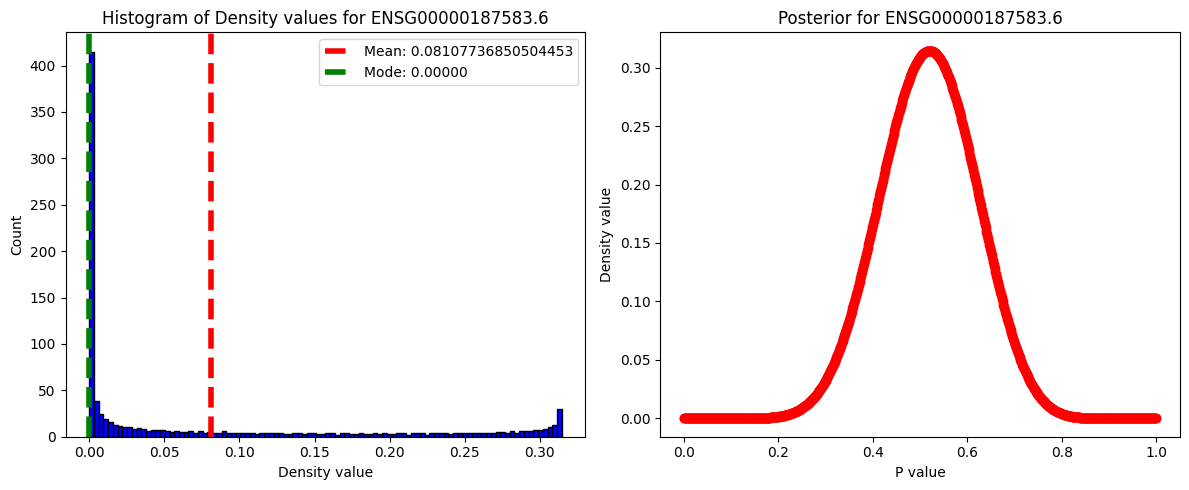

In [16]:
GIAB="/home/scarlett/github/QuickBEAST/output_data/NA12878_dist.tsv"
input_file_name=GIAB
visualize_gene_data(input_file_name)


In [12]:
n_hets=10
n_depth=100
alpha_beta=8.789625
lambdas=0.04545
sigma=0.7
alt=0.5
n_gene=1000
theta=1

mode_qb_pos, mode_qb_neg, mode_qb_pos_p_st, mode_qb_neg_p_st, POS, NEG = prepare_data_for_plotting(n_gene, n_hets, n_depth, alt, sigma)

NameError: name 'prepare_data_for_plotting' is not defined

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def visualize_gene_data(input_file_name, gene_id):
    with open(input_file_name, 'r') as file:
        lines = file.readlines()

    # Find all lines that contain the given gene_id
    matching_lines = [line.strip() for line in lines if gene_id in line.split('\t')[0]]

    # Check if any matches were found
    if not matching_lines:
        print(f"Gene ID {gene_id} not found in the file.")
        return

    fig, axs = plt.subplots(len(matching_lines), 2, figsize=(12, 5 * len(matching_lines)))

    if len(matching_lines) == 1:
        axs = [axs]

    for idx, selected_line in enumerate(matching_lines):
        # Split the selected line into parts
        parts = selected_line.split('\t')

        # Extract the exact gene ID
        exact_gene_id = parts[0]

        # Extract Xs and Ys
        xs = parts[1::2]  # Take every second element starting from the first
        ys = parts[2::2]  # Take every second element starting from the second

        # Converting strings to floats for Xs and Ys if needed
        x_values = [float(x) for x in xs]
        y_values = [float(y) for y in ys]

        # Convert y_values to numeric, coercing errors to NaN
        y_values_numeric = pd.to_numeric(y_values, errors='coerce')

        # Filter out NaN values
        filtered_y_values = y_values_numeric[~np.isnan(y_values_numeric)]

        # Calculate mode
        mode_result = stats.mode(filtered_y_values)

        # Check if mode_result.mode is a scalar or an array
        if np.isscalar(mode_result.mode):
            y_mode = mode_result.mode
        else:
            y_mode = mode_result.mode[0]

        # Calculate mean
        y_mean = np.nanmean(y_values_numeric)

        # Plot histogram of Y values
        axs[idx][0].hist(y_values, bins=100, color='blue', edgecolor='black')
        axs[idx][0].axvline(y_mean, color='red', linestyle='dashed', linewidth=4, label=f'Mean: {y_mean}')
        axs[idx][0].axvline(y_mode, color='green', linestyle='dashed', linewidth=4, label=f'Mode: {y_mode:.5f}')
        axs[idx][0].set_title(f'Histogram of Density values for {exact_gene_id}')
        axs[idx][0].set_xlabel('Density value')
        axs[idx][0].set_ylabel('Count')
        axs[idx][0].legend()

        # Scatter plot of X vs Y values
        axs[idx][1].scatter(x_values, y_values, color='red')
        axs[idx][1].set_title(f'Posterior for {exact_gene_id}')
        axs[idx][1].set_xlabel('P value')
        axs[idx][1].set_ylabel('Density value')

    plt.tight_layout()
    plt.show()

# Example usage:
# visualize_gene_data('path/to/your/file.txt', 'ENSG00000048471')


In [19]:
GIAB="/home/scarlett/github/QuickBEAST/output_data/NA12878_dist.tsv"
input_file_name=GIAB
visualize_gene_data(input_file_name,"ENSG000000214711.5")

Gene ID ENSG000000214711.5 not found in the file.


## 1. read p-values from each method, multiple testing corrections <br>2. assess whether p-values accurate at the tail (empirical p-values vs t-pval)

#### checking the p-values from qb output

In [8]:

def get_data(n_gene,n_hets,n_depth,alt,sigma=0.7):
    NEG=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-1_s-{sigma}.pickle"
    POS=f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}.pickle"
    ns_NEG,ns_POS,qb_NEG_name,qb_POS_name = get_filename(POS,NEG)
    path_beastie = "/data2/stan/iBEASTIE4/sigma0.7/parametrized/ASE_0.05_error/output_pkl/"
    path_qb=f"/data2/stan/quickBEAST/a8.789625_b8.789625/lambda0.04545/parametrized/ASE_0.05_error/"
    NS_path="/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p"
    qb_POS, qb_NEG = get_qb_output(qb_POS_name, qb_NEG_name, path_qb)
    _,_,qb_POS_p, qb_NEG_p,_,_ = get_qb_p_values(qb_POS, qb_NEG)
    b_pos, b_neg = get_BEASTIE_tsv(NEG,POS,path_beastie)
    b_pos_p, b_neg_p = get_BEASTIE_pval(b_pos, b_neg)
    ns_POS_p, ns_NEG_p = get_NS_p_values(ns_POS, ns_NEG, NS_path)
    return qb_POS_p, qb_NEG_p, b_pos_p, b_neg_p,ns_POS_p, ns_NEG_p, qb_POS, qb_NEG, b_pos, b_neg

def get_qb_output(qb_POS, qb_NEG, qb_path):
    qb_pos_file=pd.read_csv(f"{qb_path}/{qb_POS}",delimiter="\t",header=0)
    qb_neg_file=pd.read_csv(f"{qb_path}/{qb_NEG}",delimiter="\t",header=0)
    return qb_pos_file,qb_neg_file

def get_qb_p_values(qb_pos_file,qb_neg_file):                         
    qb_pos_p_t = qb_pos_file['t_p_value'].tolist()
    qb_neg_p_t = qb_neg_file['t_p_value'].tolist()
    qb_pos_p_st = qb_pos_file['st_p_value'].tolist()
    qb_neg_p_st = qb_neg_file['st_p_value'].tolist()
    qb_pos_p_n = qb_pos_file['normal_p_value'].tolist()
    qb_neg_p_n = qb_neg_file['normal_p_value'].tolist()
    return qb_pos_p_t,qb_neg_p_t,qb_pos_p_st,qb_neg_p_st,qb_pos_p_n,qb_neg_p_n

def get_BEASTIE_tsv(NEG,POS,path_beastie):
    NEG = NEG.replace('.pickle', '.tsv')
    POS = POS.replace('.pickle', '.tsv')
    NEG = pd.read_csv(path_beastie+NEG,sep="\t")
    POS = pd.read_csv(path_beastie+POS,sep="\t")
    return POS, NEG

def get_BEASTIE_pval(NEG,POS):
    NEG_pval = NEG["st_p_value"].values
    POS_pval = POS["st_p_value"].values
    return POS_pval,NEG_pval

def get_filename(b_POS,b_NEG):  
    ns_NEG = re.sub(r'_s-\d+(\.\d+)?', '', b_NEG)
    ns_POS = re.sub(r'_s-\d+(\.\d+)?', '', b_POS)
    qb_NEG = re.sub(r'_s-\d+(\.\d+)?', '', b_NEG).replace('.pickle', '.txt')
    qb_POS = re.sub(r'_s-\d+(\.\d+)?', '', b_POS).replace('.pickle', '.txt')
    return ns_NEG,ns_POS,qb_NEG,qb_POS

def get_corrected_p(qb_POS_p,qb_NEG_p):
    # Apply FDR correction
    _, qb_POS_p_fdr, _, _ = multipletests(qb_POS_p, method='fdr_bh')
    _, qb_NEG_p_fdr, _, _ = multipletests(qb_NEG_p, method='fdr_bh')

    # Apply Bonferroni correction
    _, qb_POS_p_bonf, _, _ = multipletests(qb_POS_p, method='bonferroni')
    _, qb_NEG_p_bonf, _, _ = multipletests(qb_NEG_p, method='bonferroni')
    return qb_POS_p_fdr, qb_NEG_p_fdr, qb_POS_p_bonf, qb_NEG_p_bonf



### 1. get p-values from each methods

### 2. assess whether p-values accurate at the tail (empirical p-values vs t-pval)

In [9]:
def create_power_table(df1,alpha,empirical_power,st_power, t_power, n_power,empirical_type1,st_type1, t_type1, n_type1, title):
    # Calculate percentages of the power for both columns
    total_count = len(df1)
    empirical_pval_power = (empirical_power / total_count) * 100
    st_pval_power = (st_power / total_count) * 100
    t_p_val_power = (t_power / total_count) * 100
    n_p_val_power = (n_power / total_count) * 100

    empirical_pval_type1 = (empirical_type1 / total_count) * 100
    st_pval_type1 = (st_type1 / total_count) * 100
    t_p_val_type1 = (t_type1 / total_count) * 100
    n_p_val_type1 = (n_type1 / total_count) * 100
    # Create a PrettyTable instance
    power_table = PrettyTable()

    # Define table headers and data
    power_table.field_names = [title, "Power (%)", "Type1error (%)"]
    power_table.add_row(["Empirical p-value", f"{empirical_pval_power:.3f}%",f"{empirical_pval_type1:.3f}%"])
    power_table.add_row(["Skewed T p-value", f"{st_pval_power:.3f}%",f"{st_pval_type1:.3f}%"])
    power_table.add_row(["Standard T p-value", f"{t_p_val_power:.3f}%",f"{t_p_val_type1:.3f}%"])
    power_table.add_row(["Normal p-value", f"{n_p_val_power:.3f}%",f"{n_p_val_type1:.3f}%"])

    # Add a title to the table
    power_table.title = f"Power = % corrected pvalues from ALT < {alpha} & Type1 = % corrected pvalues from NULL < {alpha}"
    print(power_table)

def get_corrected_p(qb_POS_p,qb_NEG_p):
    # Apply FDR correction
    _, qb_POS_p_fdr, _, _ = multipletests(qb_POS_p, method='fdr_bh')
    _, qb_NEG_p_fdr, _, _ = multipletests(qb_NEG_p, method='fdr_bh')

    # Apply Bonferroni correction
    _, qb_POS_p_bonf, _, _ = multipletests(qb_POS_p, method='bonferroni')
    _, qb_NEG_p_bonf, _, _ = multipletests(qb_NEG_p, method='bonferroni')
    return qb_POS_p_fdr, qb_NEG_p_fdr, qb_POS_p_bonf, qb_NEG_p_bonf

def count_values_below_cutoff(df, alpha):
    # bonferrnoni correction for pvalue columns
    empirical_p = df['empirical_pval'].tolist()
    _, empirical_p_bonf, _, _ = multipletests(empirical_p, method='bonferroni')
    df['empirical_pval_bonf'] = empirical_p_bonf
    t_p_val = df['t_p_value'].tolist()
    _, t_p_val_bonf, _, _ = multipletests(t_p_val, method='bonferroni')
    df['t_p_value_bonf'] = t_p_val_bonf
    st_p_val = df['st_p_value'].tolist()
    _, st_p_val_bonf, _, _ = multipletests(st_p_val, method='bonferroni')
    df['st_p_value_bonf'] = st_p_val_bonf
    normal_p_val = df['normal_p_value'].tolist()
    _, normal_p_val_bonf, _, _ = multipletests(normal_p_val, method='bonferroni')
    df['normal_p_value_bonf'] = normal_p_val_bonf

    # Count the number of values in "empirical_pval" column below alpha
    empirical_pval_below_alpha = (df['empirical_pval_bonf'] < alpha).sum()

    # Count the number of values in "t_p_val" column below alpha
    t_p_val_below_alpha = (df['t_p_value_bonf'] < alpha).sum()

    # Count the number of values in "t_p_val" column below alpha
    st_p_val_below_alpha = (df['st_p_value_bonf'] < alpha).sum()

    # Count the number of values in "t_p_val" column below alpha
    n_p_val_below_alpha = (df['normal_p_value_bonf'] < alpha).sum()

    return empirical_pval_below_alpha, st_p_val_below_alpha, t_p_val_below_alpha, n_p_val_below_alpha


In [71]:
def calculate_empirical_pvalues(df, null_dataframe,column):
    # Sort the null dataframe's zscore values
    null_dataframe = null_dataframe.sort_values(by=column)

    # Initialize an empty list to store the p-values
    pvalues = []

    # Loop through the zscore values in your original dataframe
    for zscore in df[column]:
        # Calculate the two-sided p-value based on the null distribution
        left_tail_p = (null_dataframe[column] <= zscore).mean()
        right_tail_p = (null_dataframe[column] >= zscore).mean()
        two_sided_pvalue = 2 * min(left_tail_p, right_tail_p)

        # Append the p-value to the list
        pvalues.append(two_sided_pvalue)

    # Add the calculated p-values as a new column in your original dataframe
    df['empirical_pval'] = pvalues

    return df

def calculate_empirical_p(n_gene,n_null,n_hets,n_depth,alt,alpha,column,sigma=0.7):
    _,_,_,_,_,_, qb_POS, qb_NEG, _,_ = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)
    # qb_pos_p_fdr, qb_neg_p_fdr, qb_pos_p_bonf, qb_neg_p_bonf = get_corrected_p(qb_pos_p,qb_neg_p)
    # b_pos_p_fdr, b_neg_p_fdr, b_pos_p_bonf, b_neg_p_bonf = get_corrected_p(b_pos_p,b_neg_p)
    # ns_pos_p_fdr, ns_neg_p_fdr, ns_pos_p_bonf, ns_neg_p_bonf = get_corrected_p(ns_pos_p,ns_neg_p)

    NEG=f"g-{n_null}_h-{n_hets}_d-{n_depth}_t-1_s-{sigma}.pickle"
    POS=f"g-{n_null}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}.pickle"
    _,_,qb_NEG_name,qb_POS_name = get_filename(POS,NEG)
    path_qb=f"/data2/stan/quickBEAST/a8.789625_b8.789625/lambda0.04545/parametrized/ASE_0.05_error/"
    emp_qb_POS, emp_qb_NEG = get_qb_output(qb_POS_name, qb_NEG_name, path_qb)
    power_emp = calculate_empirical_pvalues(qb_POS, emp_qb_POS,column)
    type1_emp = calculate_empirical_pvalues(qb_NEG, emp_qb_NEG,column)
    empirical_power,st_power, t_power, n_power = count_values_below_cutoff(power_emp, alpha)
    empirical_type1,st_type1, t_type1, n_type1 = count_values_below_cutoff(type1_emp, alpha)
    create_power_table(power_emp,alpha,empirical_power,st_power,t_power, n_power, empirical_type1,st_type1, t_type1, n_type1, "Bonferroni corrected p-values")

    x=type1_emp['st_p_value'].tolist()
    y=type1_emp['empirical_pval'].tolist()

    # Line y = x
    # Create scatter plot
    # Transform p-values to -log10 scale
    y_transformed = -np.log10(y)
    x_transformed = -np.log10(x)

    # Create scatter plot
    plt.scatter(x_transformed, y_transformed)

    # Line y = x, adjusted for the transformation
    x_min = min(min(x_transformed), min(y_transformed))
    x_max = max(max(x_transformed), max(y_transformed))
    x_line = np.linspace(x_min, x_max, 100)  # 100 points for smoothness
    plt.plot(x_line, x_line, 'r')  # 'r' is the color red

    # Update labels to reflect the logarithmic scale
    plt.xlabel("-log10(skewed t pvalues)")
    plt.ylabel("-log10(empirical t pvalues)")
    plt.title(f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-1")

    # Show plot
    plt.show()
    return qb_POS, qb_NEG,power_emp,type1_emp

+--------------------------------------------------------------------------------------------+
| Power = % corrected pvalues from ALT < 0.05 & Type1 = % corrected pvalues from NULL < 0.05 |
+------------------------------------------------+----------------+--------------------------+
|         Bonferroni corrected p-values          |   Power (%)    |      Type1error (%)      |
+------------------------------------------------+----------------+--------------------------+
|               Empirical p-value                |     0.400%     |          0.000%          |
|                Skewed T p-value                |    13.000%     |          0.000%          |
|               Standard T p-value               |     5.600%     |          0.000%          |
|                 Normal p-value                 |    13.500%     |          0.000%          |
+------------------------------------------------+----------------+--------------------------+


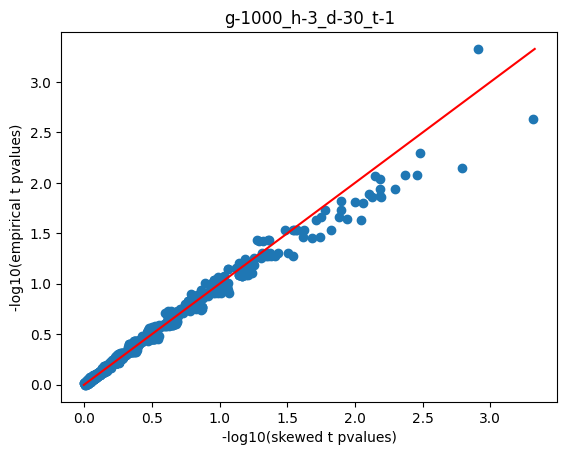

In [72]:
alpha=0.05
n_gene=1000
n_null=19207904
n_hets=3
n_depth=30
alt=0.5
column='qb_mode'
qb_POS, qb_NEG,alt,null = calculate_empirical_p(n_gene,n_null,n_hets,n_depth,alt,alpha,column)

+--------------------------------------------------------------------------------------------+
| Power = % corrected pvalues from ALT < 0.05 & Type1 = % corrected pvalues from NULL < 0.05 |
+------------------------------------------------+----------------+--------------------------+
|         Bonferroni corrected p-values          |   Power (%)    |      Type1error (%)      |
+------------------------------------------------+----------------+--------------------------+
|               Empirical p-value                |     2.700%     |          0.000%          |
|                Skewed T p-value                |    100.000%    |          0.000%          |
|               Standard T p-value               |    99.900%     |          0.000%          |
|                 Normal p-value                 |    100.000%    |          0.000%          |
+------------------------------------------------+----------------+--------------------------+


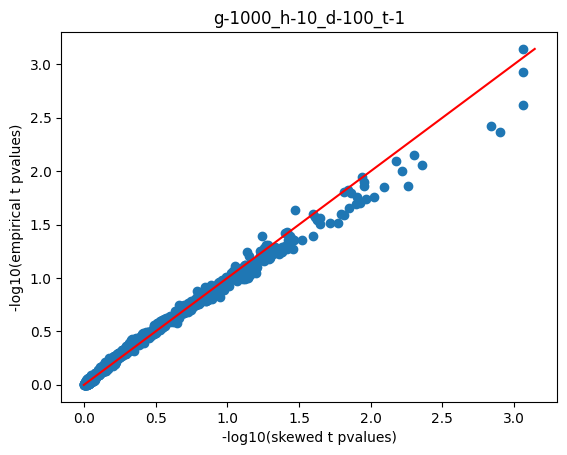

In [73]:
alpha=0.05
n_gene=1000
n_null=19207904
n_hets=10
n_depth=100
alt=0.5
column='qb_mode'
_,_,alt,null = calculate_empirical_p(n_gene,n_null,n_hets,n_depth,alt,alpha,column)

+--------------------------------------------------------------------------------------------+
| Power = % corrected pvalues from ALT < 0.05 & Type1 = % corrected pvalues from NULL < 0.05 |
+------------------------------------------------+----------------+--------------------------+
|         Bonferroni corrected p-values          |   Power (%)    |      Type1error (%)      |
+------------------------------------------------+----------------+--------------------------+
|               Empirical p-value                |     0.000%     |          0.000%          |
|                Skewed T p-value                |     0.000%     |          0.000%          |
|               Standard T p-value               |     0.000%     |          0.000%          |
|                 Normal p-value                 |     0.000%     |          0.000%          |
+------------------------------------------------+----------------+--------------------------+


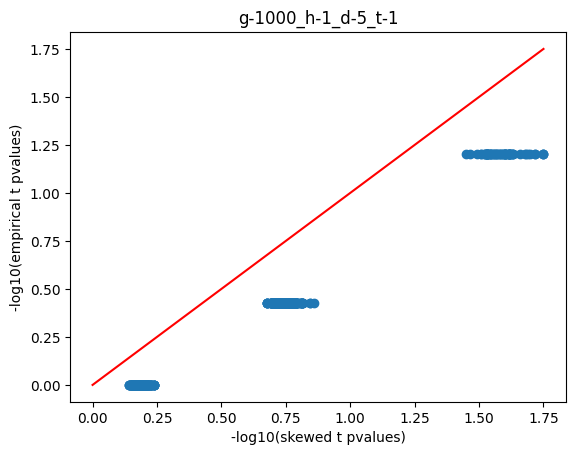

In [74]:
alpha=0.05
n_gene=1000
n_null=19207904
n_hets=1
n_depth=5
alt=0.5
column='qb_mode'
_,_,alt, null = calculate_empirical_p(n_gene,n_null,n_hets,n_depth,alt,alpha,column)

In [6]:
def investigate_emp_pvals(alpha,n_gene,n_null,n_hets,n_depth,alt,sigma):
    qb_pos_p, qb_neg_p,b_pos_p, b_neg_p,ns_pos_p, ns_neg_p, qb_POS, qb_NEG, b_pos, b_neg = get_data(n_gene,n_hets,n_depth,alt,sigma=0.7)

    NEG=f"g-{n_null}_h-{n_hets}_d-{n_depth}_t-1_s-{sigma}.pickle"
    POS=f"g-{n_null}_h-{n_hets}_d-{n_depth}_t-{alt}_s-{sigma}.pickle"
    ns_NEG,ns_POS,qb_NEG_name,qb_POS_name = get_filename(POS,NEG)
    path_qb=f"/data2/stan/quickBEAST/a8.789625_b8.789625/lambda0.04545/parametrized/ASE_0.05_error/"
    emp_qb_POS, emp_qb_NEG = get_qb_output(qb_POS_name, qb_NEG_name, path_qb)

    power_emp = calculate_empirical_pvalues(qb_POS, emp_qb_NEG)
    type1_emp = calculate_empirical_pvalues(qb_NEG, emp_qb_NEG)

    empirical_power,st_power, t_power, n_power = count_values_below_cutoff(power_emp, alpha)
    empirical_type1,st_type1, t_type1, n_type1 = count_values_below_cutoff(type1_emp, alpha)

    create_power_table(power_emp,alpha,empirical_power,st_power,t_power, n_power, empirical_type1,st_type1, t_type1, n_type1, f"g-{n_gene}_h-{n_hets}_d-{n_depth}_t-{alt}")

In [7]:
alpha=0.05
n_gene=1000
n_null=19207904
n_hets=10
n_depth=100
alt=0.5
sigma=0.7
investigate_emp_pvals(alpha,n_gene,n_null,n_hets,n_depth,alt,sigma)

NameError: name 'get_data' is not defined

In [49]:
alpha=0.05
n_gene=1000
n_null=19207904
n_hets=3
n_depth=30
alt=0.5
sigma=0.7
investigate_emp_pvals(alpha,n_gene,n_null,n_hets,n_depth,alt,sigma)

+--------------------------------------------------------------------------+
| Power = %p-values from ALT < 5e-05 & Type1 = %p-values from NULL < 5e-05 |
+---------------------------------+---------------+------------------------+
|      g-1000_h-3_d-30_t-0.5      |   Power (%)   |     Type1error (%)     |
+---------------------------------+---------------+------------------------+
|        Empirical p-value        |     10.90%    |         0.00%          |
|         Skewed T p-value        |     13.00%    |         0.00%          |
|        Standard T p-value       |     5.60%     |         0.00%          |
|          Normal p-value         |     13.50%    |         0.00%          |
+---------------------------------+---------------+------------------------+


In [50]:
alpha=0.05
n_gene=1000
n_null=19207904
n_hets=1
n_depth=5
alt=0.5
sigma=0.7
investigate_emp_pvals(alpha,n_gene,n_null,n_hets,n_depth,alt,sigma)

+--------------------------------------------------------------------------+
| Power = %p-values from ALT < 5e-05 & Type1 = %p-values from NULL < 5e-05 |
+--------------------------------+---------------+-------------------------+
|      g-1000_h-1_d-5_t-0.5      |   Power (%)   |      Type1error (%)     |
+--------------------------------+---------------+-------------------------+
|       Empirical p-value        |     0.00%     |          0.00%          |
|        Skewed T p-value        |     0.00%     |          0.00%          |
|       Standard T p-value       |     0.00%     |          0.00%          |
|         Normal p-value         |     0.00%     |          0.00%          |
+--------------------------------+---------------+-------------------------+
